In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 9.9 MB 33.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

In [ ]:
df  = pd.read_csv('/content/drive/MyDrive/MiniProject/royapuram_model.csv')

In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/MiniProject/chandnichowk_model.csv')

In [ ]:
df

,Unnamed: 0,Day,Date,Time,PM2.5,PM10,NO2,SO2,CO,OZONE,AQI
0,0,Monday,01-08-2022,00:00:00,20.0,31.0,22.647152,2.0,40.0,9.0,40
1,1,Monday,01-08-2022,01:00:00,20.0,30.0,22.647152,3.0,37.0,9.0,40
2,2,Monday,01-08-2022,02:00:00,23.5,27.5,22.647152,2.5,39.5,8.5,41
3,3,Monday,01-08-2022,03:00:00,27.0,25.0,22.647152,2.0,42.0,8.0,41
4,4,Monday,01-08-2022,04:00:00,20.0,20.0,22.647152,1.0,36.0,4.0,41
...,...,...,...,...,...,...,...,...,...,...,...
739,739,Wednesday,31-08-2022,19:00:00,6.0,20.0,11.000000,5.0,63.0,4.0,51
740,740,Wednesday,31-08-2022,20:00:00,12.0,13.0,19.000000,6.0,86.0,6.0,56
741,741,Wednesday,31-08-2022,21:00:00,19.0,22.0,18.000000,3.0,77.0,6.0,59
742,742,Wednesday,31-08-2022,22:00:00,15.0,24.0,18.000000,4.0,106.0,7.0,65


In [ ]:
df1 = df[['AQI']]

In [ ]:
df1

,AQI
0,40
1,40
2,41
3,41
4,41
...,...
739,51
740,56
741,59
742,65


In [ ]:
df1.AQI

0      40
1      40
2      41
3      41
4      41
       ..
739    51
740    56
741    59
742    65
743    72
Name: AQI, Length: 744, dtype: int64

In [ ]:
df2 = dff[['AQI']]

In [ ]:
model = pm.auto_arima(df1.AQI, start_p=1, start_q=1, test='adf', max_p=3, max_q=3, m=1, d=None,           
                      seasonal=False, start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, 
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3063.282, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8408.701, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2951.790, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.19 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2953.489, Time=0.21 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2953.695, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2996.091, Time=0.11 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2954.495, Time=0.89 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=2922.596, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3053.533, Time=0.44 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2922.337, Time=0.28 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3398.892, T

In [ ]:
model

ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
import statsmodels.api as sm

In [ ]:
model2=sm.tsa.statespace.SARIMAX(df1['AQI'],order=(2, 0, 0),seasonal_order=(2,1,0,30))
results=model2.fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


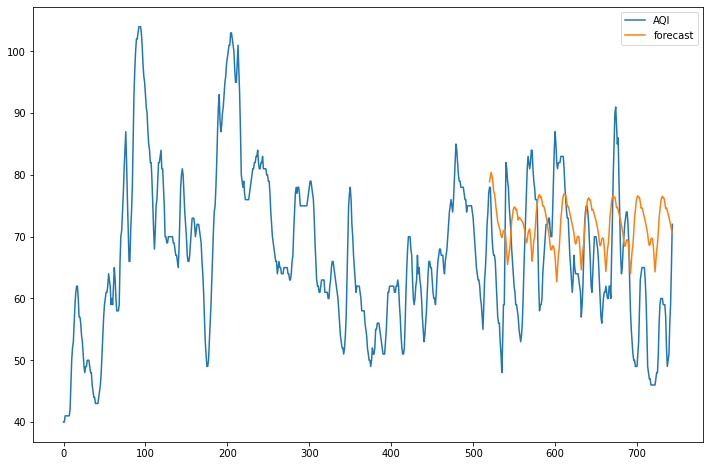

In [ ]:
df1['forecast']=results.predict(start=520,end=743,dynamic=True)
df1[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
model3 = pm.auto_arima(df2.AQI, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5118.268, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8537.037, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7575.354, Time=0.23 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5088.090, Time=0.26 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5041.870, Time=0.39 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5026.878, Time=0.47 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5026.879, Time=0.43 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=5030.803, Time=0.45 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5029.622, Time=0.36 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=5020.448, Time=1.37 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5018.977, Time=0.75 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5017.1

In [ ]:
model4=sm.tsa.statespace.SARIMAX(df2['AQI'],order=(1, 0, 2),seasonal_order=(2,2,0,30))
results=model4.fit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


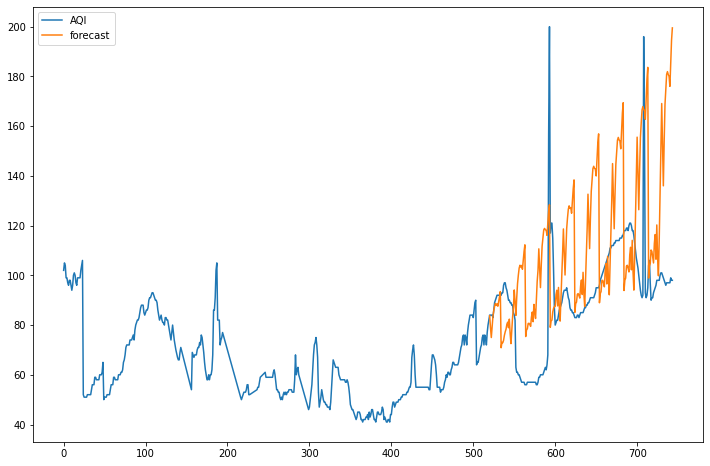

In [ ]:
df2['forecast']=results.predict(start=520,end=743,dynamic=True)
df2[['AQI','forecast']].plot(figsize=(12,8))

In [ ]:
df1

,AQI,forecast
0,40,NaN
1,40,NaN
2,41,NaN
3,41,NaN
4,41,NaN
...,...,...
739,51,73.111737
740,56,72.540799
741,59,71.916687
742,65,71.142937


In [ ]:
df2

,AQI,forecast
0,102.0,NaN
1,105.0,NaN
2,104.0,NaN
3,99.0,NaN
4,99.0,NaN
...,...,...
739,97.0,180.004258
740,97.0,176.003526
741,99.0,185.853404
742,98.0,194.586482


In [ ]:
dff1 = df1.dropna()

In [ ]:
dff1

,AQI,forecast
520,78,78.892640
521,78,79.726324
522,74,80.419554
523,70,79.791145
524,68,78.943661
...,...,...
739,51,73.111737
740,56,72.540799
741,59,71.916687
742,65,71.142937


In [ ]:
dff2= df2.dropna()

In [ ]:
dff2

,AQI,forecast
520,84.0,83.747176
521,84.0,78.964818
522,84.0,74.986753
523,84.0,79.164394
524,83.0,83.475509
...,...,...
739,97.0,180.004258
740,97.0,176.003526
741,99.0,185.853404
742,98.0,194.586482


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
sqrt(mean_squared_error(dff1.AQI, dff1.forecast))

12.62791060789605

In [ ]:
sqrt(mean_squared_error(dff2.AQI, dff2.forecast))

36.95742362395335